Chapter 18: Arguments
=====================

![00 metafora pulpo variables.png](<attachment:00 metafora pulpo variables.png>)

![01 Variables, objetos y referencias.png](<attachment:01 Variables, objetos y referencias.png>)

![02 objeto con dos referencias.png](<attachment:02 objeto con dos referencias.png>)

## 1. Arguments and Shared References


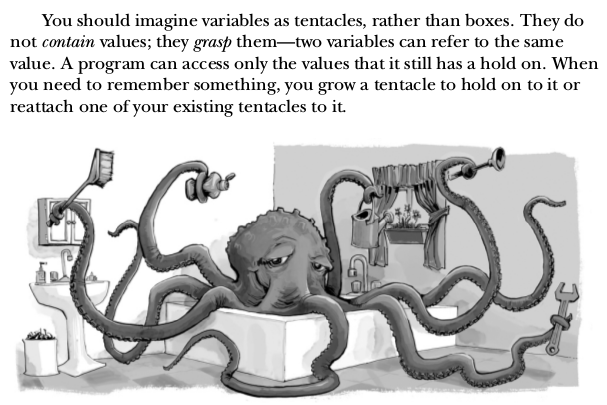
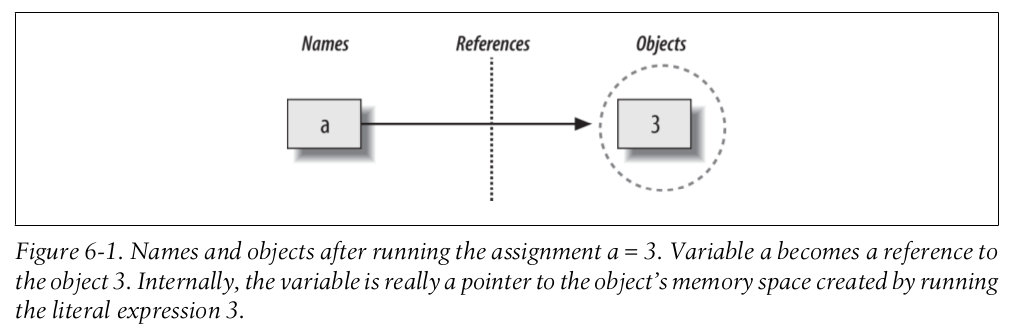
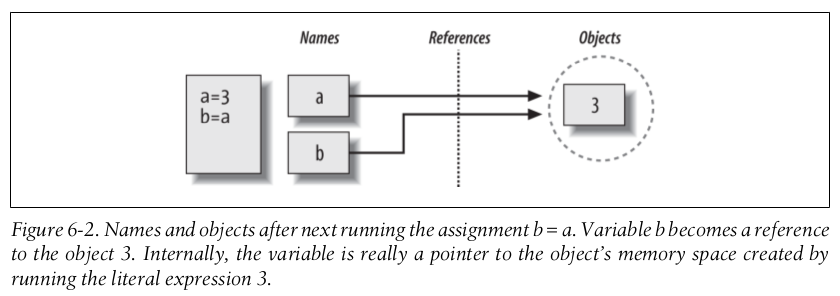

In [7]:
def f(a):	    	
	a = 99 			

b = 88		
f(b)				
print("b = ", b)	

b =  88


### Paso de objetos mutables:


In [8]:

def changer(a, b):	    
		a = 2			
		b[0] = 'spam' 		
					
x = 1
l = [1, 2]
changer(x, l)           
print("l = ", l)        
assert x == 1, "x es 1"

l =  ['spam', 2]


### Evitar que se cambien los elementos mutables por la rutina:

#### - copia

In [9]:

l = [1, 2]
changer(x, l[:]) 	# copia 

print("l = ", l) 


l =  [1, 2]


#### - Invariantes 

In [10]:
l = [1, 2]
def changer(a, b):
    b = b[:]		
    a = 2
    b[0] = 'spam'	

changer(x, l)
assert l == [1, 2], "l es una invariante"
print("l = ", l) 


l =  [1, 2]


#### - Pasar objeto mutable a inmutable:


In [13]:

l = [1, 2]
def changer(a, b):	   
		a = 2			
		b[0] = 'spam'   

changer(x, tuple(l))	º
print("l = ", l)
assert l == [1, 2], "l es una invariante"


TypeError: 'tuple' object does not support item assignment

## 2 Special Argument-Matching Modes



No es lo mismo `nombre=valor` en el encabezado de una función y una
llamada de función; la primera es un argumento de palabra clave y la segunda define un valor predeterminado para un argumento opcional.

### Keyword and Default Examples

#### 1. Comportamiento por defecto:

In [14]:
def f(a, b, c): 
    print(a, b, c)

f(1, 2, 3)         

1 2 3


#### 2. Keywords

El orden de los argumentos no importa si se utilizan palabras clave 

In [4]:
def f(a, b, c): 
    print(a, b, c)

f(c=3, b=2, a=1)    

1 2 3


In [15]:
f(1, c=3, b=2)		
                    

1 2 3


#### 3. Defaults

Defaults nos permiten hacer que la función seleccionada sea opcional 
si no se establece un valor.


In [17]:

def f(a, b=2, c=3): 	
	print(a, b, c)


f(1)       
f(a=1)      

1 2 3
1 2 3


Si establecemos dos valores, solo `c` obtiene su valor predeterminado


In [7]:
def f(a, b=2, c=3): 	
	print(a, b, c)
    
f(1, 4)     
f(1, 4, 5)	

f(1, c=6)	

1 4 3
1 4 5
1 2 6


#### 4. Combinar keywords and defaults



In [8]:

def func(spam, eggs, toast=0, ham=0):
	print((spam, eggs, toast, ham)) 	

func(1, 2)							
func(1, ham=1, eggs=0)				
func(spam=1, eggs=0)				
func(toast=1, eggs=2, spam=3)		
func(1, 2, 3, 4) 					


(1, 2, 0, 0)
(1, 0, 0, 1)
(1, 0, 0, 0)
(3, 2, 1, 0)
(1, 2, 3, 4)


### 5. Python 3.X Keyword-Only Arguments

`*` en la lista de argumentos para indicar que una función
no acepta una lista de argumentos de longitud variable, se pasaran los argumentos como  keywords.

In [18]:
def kwonly(a, *b, c):
    print(a, b, c)

kwonly(1, 2, c=3)       

kwonly(a=1, c=3)        

kwonly(1, 2, 3)         

1 (2,) 3
1 () 3


TypeError: kwonly() missing 1 required keyword-only argument: 'c'

Usar los valores predeterminados para argumentos de solo keywords, aunque aparezcan después del `*` en el encabezado:

In [19]:

def kwonly(a, *, b='spam', c='ham'):
	print(a, b, c)

kwonly(1)               
kwonly(1, c=3)          
kwonly(a=1)             
kwonly(c=3, b=2, a=1)  
kwonly(1, 2)            

1 spam ham
1 spam 3
1 spam ham
1 2 3


TypeError: kwonly() takes 1 positional argument but 2 were given

In [20]:

def kwonly(a, *, b, c='spam'):
    print(a, b, c)

kwonly(1, c='eggs')     

TypeError: kwonly() missing 1 required keyword-only argument: 'b'

## Arbitrary Arguments Examples
 `*` y `** `admiten funciones que toman cualquier cantidad numero de argumentos**. 


### Headers: Collecting arguments
asigna la variable args

In [2]:
def f(*args):
    print(args)

f()                 # ()
f(1,)               # (1,)
f(1, 2, 3, 4)       # (1, 2, 3, 4)  

()
(1,)
(1, 2, 3, 4)


`**` solo funciona para argumentos de keywords organizandolos en diccionarios.

In [3]:
def f(**args):
    print(args)
f()                 
f(a=1, b=2)         # {'a': 1, 'b': 2}

{}
{'a': 1, 'b': 2}


In [4]:
def f(a, *pargs, **kargs):
    print(a, pargs, kargs)
f(1, 2, 3, x=1, y=2)        # 1 (2, 3) {'y': 2, 'x': 1}

1 (2, 3) {'x': 1, 'y': 2}


### Calls: Unpacking arguments
`*` en función de llamada

In [5]:
def func(a, b, c, d): print(a, b, c, d)

args = (1, 2)
args += (3, 4)
func(*args)         #es igual

1 2 3 4


In [6]:
args = {'a': 1, 'b': 2, 'c': 3}
args['d'] = 4
func(**args)   

1 2 3 4


In [7]:
func(*(1, 2), **{'d': 4, 'c': 3})       

func(1, *(2, 3), **{'d': 4})    

func(1, c=3, *(2,), **{'d': 4})         

func(1, *(2, 3), d=4)                   

func(1, *(2,), c=3, **{'d':4})      


1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
1 2 3 4
